In [5]:
import torch
import numpy as np

import matplotlib.pyplot as plt

from torch import nn
from torch import optim

from torchvision import datasets, transforms

# Prepare data

In [9]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                               ])

# Download and load the training data
trainset = datasets.FashionMNIST("FashionMNIST_data/", download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST("FashionMNIST_data/", download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

# Building the network

In [6]:
# Define a feed-forward network
model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10),
    nn.LogSoftmax(dim=1) # dim=1 to calc softmax across columns instead of rows
)

# Define the loss
criterion = nn.NLLLoss()

# Get data
images, labels = next(iter(trainloader))

# Flatten images
images = images.view(images.shape[0], -1)

In [7]:
# Optimizers require the parameters to optimize and the learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Train the network

In [8]:
epochs = 5

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten
        images = images.view(images.shape[0], -1)
        
        # !Important: Clear the gradients. otherwise, the gradients will be accumulated
        optimizer.zero_grad()

        # Forward pass
        output = model.forward(images)
        loss = criterion(output, labels)

        # Backward pass
        loss.backward()

        # Take a update step with the optimizer
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.0589372961760075
Training loss: 0.5711367829585634
Training loss: 0.49954446695887966
Training loss: 0.46314000047600345
Training loss: 0.43790775662991027


# Test the network

In [27]:
dataiter = iter(testloader)
images, labels = dataiter.next()

img = images[0].view(1, -1)

# turn off gradients to speed up
with torch.no_grad():
    probs = model.forward(img)

output = torch.exp(probs)

In [28]:
output.argmax()

tensor(9)

In [29]:
labels[0]

tensor(9)

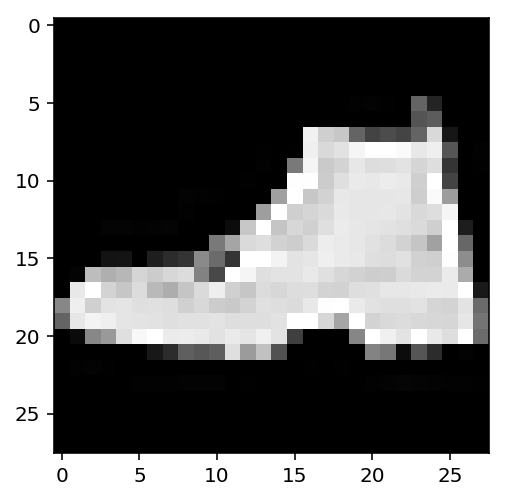

In [30]:
plt.imshow(img.view(1, 28, 28).squeeze(), cmap='gray')